In [12]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ tibble  3.1.5     ✔ dplyr   1.0.7
✔ tidyr   1.1.4     ✔ stringr 1.4.0
✔ readr   2.0.2     ✔ forcats 0.5.1
✔ purrr   0.3.4     

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()   masks stats::filter()
✖ dplyr::lag()      masks stats::lag()
✖ purrr::lift()     masks caret::lift()
✖ caret::progress() masks httr::progress()



[1] "ibm-hr-analytics-attrition-dataset"

In [13]:
attrition.df <- read.csv("../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv", stringsAsFactors = TRUE)
str(attrition.df)

'data.frame':	1470 obs. of  35 variables:
 $ Age                     : int  41 49 37 33 27 32 59 30 38 36 ...
 $ Attrition               : Factor w/ 2 levels "No","Yes": 2 1 2 1 1 1 1 1 1 1 ...
 $ BusinessTravel          : Factor w/ 3 levels "Non-Travel","Travel_Frequently",..: 3 2 3 2 3 2 3 3 2 3 ...
 $ DailyRate               : int  1102 279 1373 1392 591 1005 1324 1358 216 1299 ...
 $ Department              : Factor w/ 3 levels "Human Resources",..: 3 2 2 2 2 2 2 2 2 2 ...
 $ DistanceFromHome        : int  1 8 2 3 2 2 3 24 23 27 ...
 $ Education               : int  2 1 2 4 1 2 3 1 3 3 ...
 $ EducationField          : Factor w/ 6 levels "Human Resources",..: 2 2 5 2 4 2 4 2 2 4 ...
 $ EmployeeCount           : int  1 1 1 1 1 1 1 1 1 1 ...
 $ EmployeeNumber          : int  1 2 4 5 7 8 10 11 12 13 ...
 $ EnvironmentSatisfaction : int  2 3 4 4 1 4 3 4 4 3 ...
 $ Gender                  : Factor w/ 2 levels "Female","Male": 1 2 2 1 2 2 1 2 2 2 ...
 $ HourlyRate              : int  94 6

In [14]:
head(attrition.df)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,⋯,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
,<int>,<fct>,<fct>,<int>,<fct>,<int>,<int>,<fct>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,⋯,1,80,0,8,0,1,6,4,0,5
2,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,⋯,4,80,1,10,3,3,10,7,1,7
3,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,⋯,2,80,0,7,3,3,0,0,0,0
4,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,⋯,3,80,0,8,3,3,8,7,3,0
5,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,⋯,4,80,1,6,3,3,2,2,2,2
6,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,⋯,3,80,0,8,2,2,7,7,3,6


In [15]:
attrition.df %>% 
  select(Attrition) %>%
  group_by(Attrition) %>% 
  summarize(N = n()) %>% 
  mutate(percent = round(prop.table(N), 2))


Attrition,N,percent
<fct>,<int>,<dbl>
No,1233,0.84
Yes,237,0.16


# Exploratory Data Analysis

### Exploring Relationship between field of education and Attrition

In [16]:
  summary(attrition.df$EducationField)

Human Resources    Life Sciences        Marketing          Medical 
              27              606              159              464 
           Other Technical Degree 
              82              132

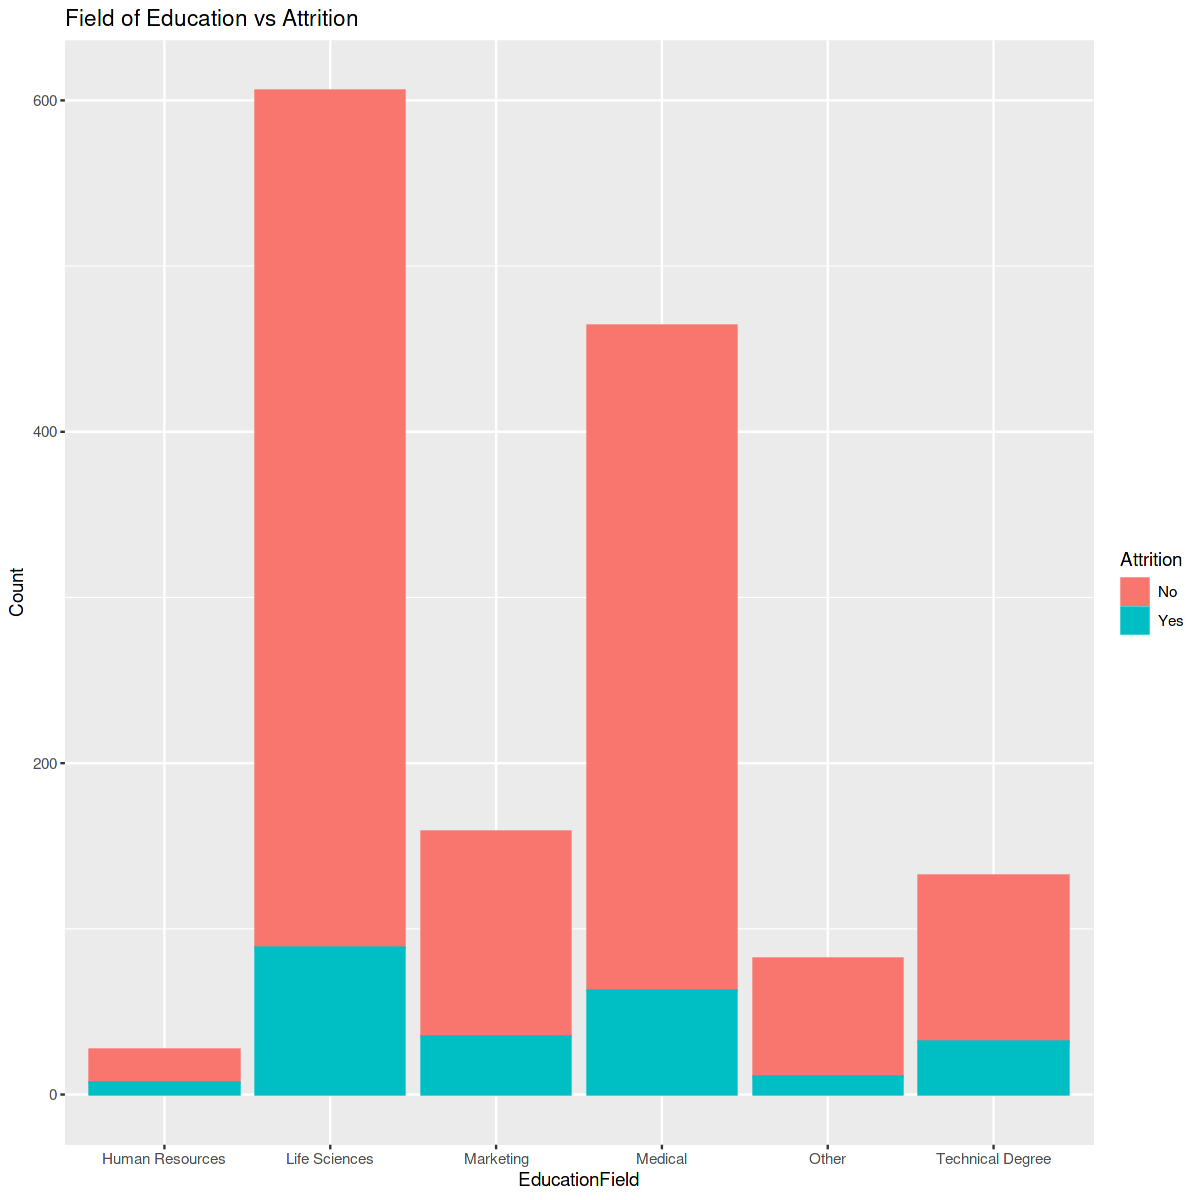

In [17]:
library(repr)
options(repr.plot.width=10, repr.plot.height = 10) 
  ggplot(data=attrition.df)+
    geom_bar(aes(x=EducationField,color=Attrition,fill=Attrition))+
    ggtitle("Field of Education vs Attrition ") + 
    labs(x = "EducationField", y = "Count")

`summarise()` has grouped output by 'EducationField'. You can override using the `.groups` argument.



EducationField,Gender,Count
<fct>,<fct>,<int>
Human Resources,Female,3
Human Resources,Male,4
Life Sciences,Female,38
Life Sciences,Male,51
Marketing,Female,15
Marketing,Male,20
Medical,Female,19
Medical,Male,44
Other,Female,2


`summarise()` has grouped output by 'EducationField'. You can override using the `.groups` argument.



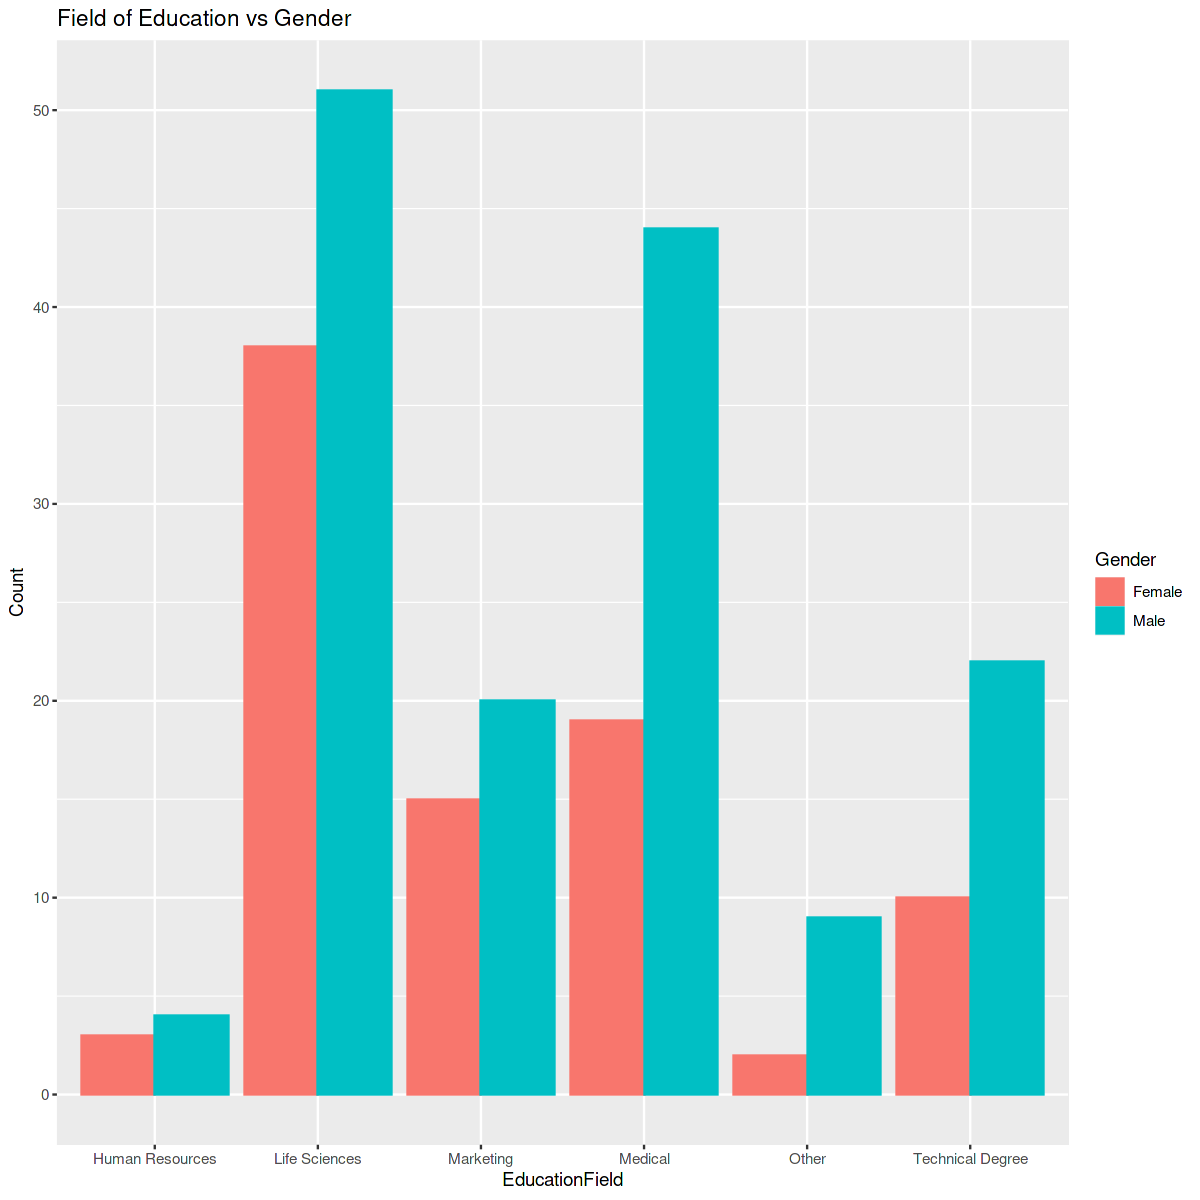

In [18]:
attrition.df %>% 
    select(Attrition,Gender,EducationField) %>%
    filter (Attrition=="Yes") %>%
    group_by(EducationField,Gender) %>% 
    summarise(Count=n()) 
  
  attr_new <- attrition.df %>% 
    select(Attrition,Gender,EducationField) %>%
    filter (Attrition=="Yes") %>%
    group_by(EducationField,Gender) %>% 
    summarise(Count=n()) 

  ggplot(data=attr_new,aes(x=EducationField,y = Count,color=Gender,fill=Gender))+
    geom_bar(stat="identity", position=position_dodge())+
    ggtitle("Field of Education vs Gender ")+
  labs(x = "EducationField", y = "Count")

### Exploring Data to find relation between Income and Attrition 



In [19]:
  attrition.df %>% 
    summarise(Median = median(MonthlyIncome), 
              Mean = mean(MonthlyIncome),
              Max = max(MonthlyIncome), 
              Min = min(MonthlyIncome))

Median,Mean,Max,Min
<dbl>,<dbl>,<int>,<int>
4919,6502.931,19999,1009


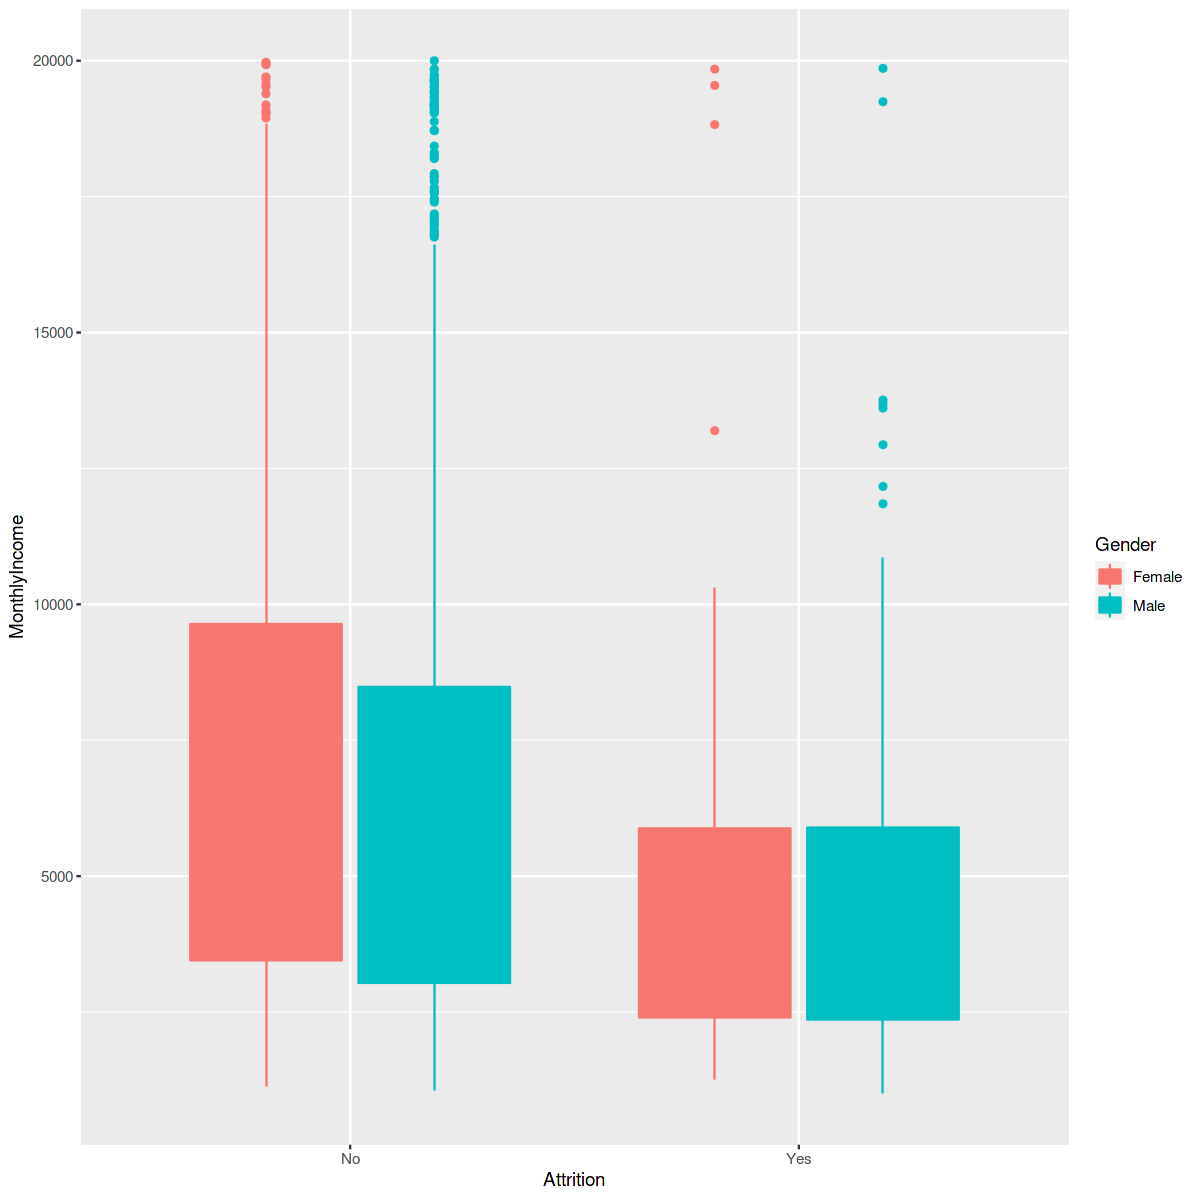

In [20]:
  ggplot(attrition.df, aes(x=Attrition, y=MonthlyIncome, color=Gender, fill=Gender)) +
    geom_boxplot() 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



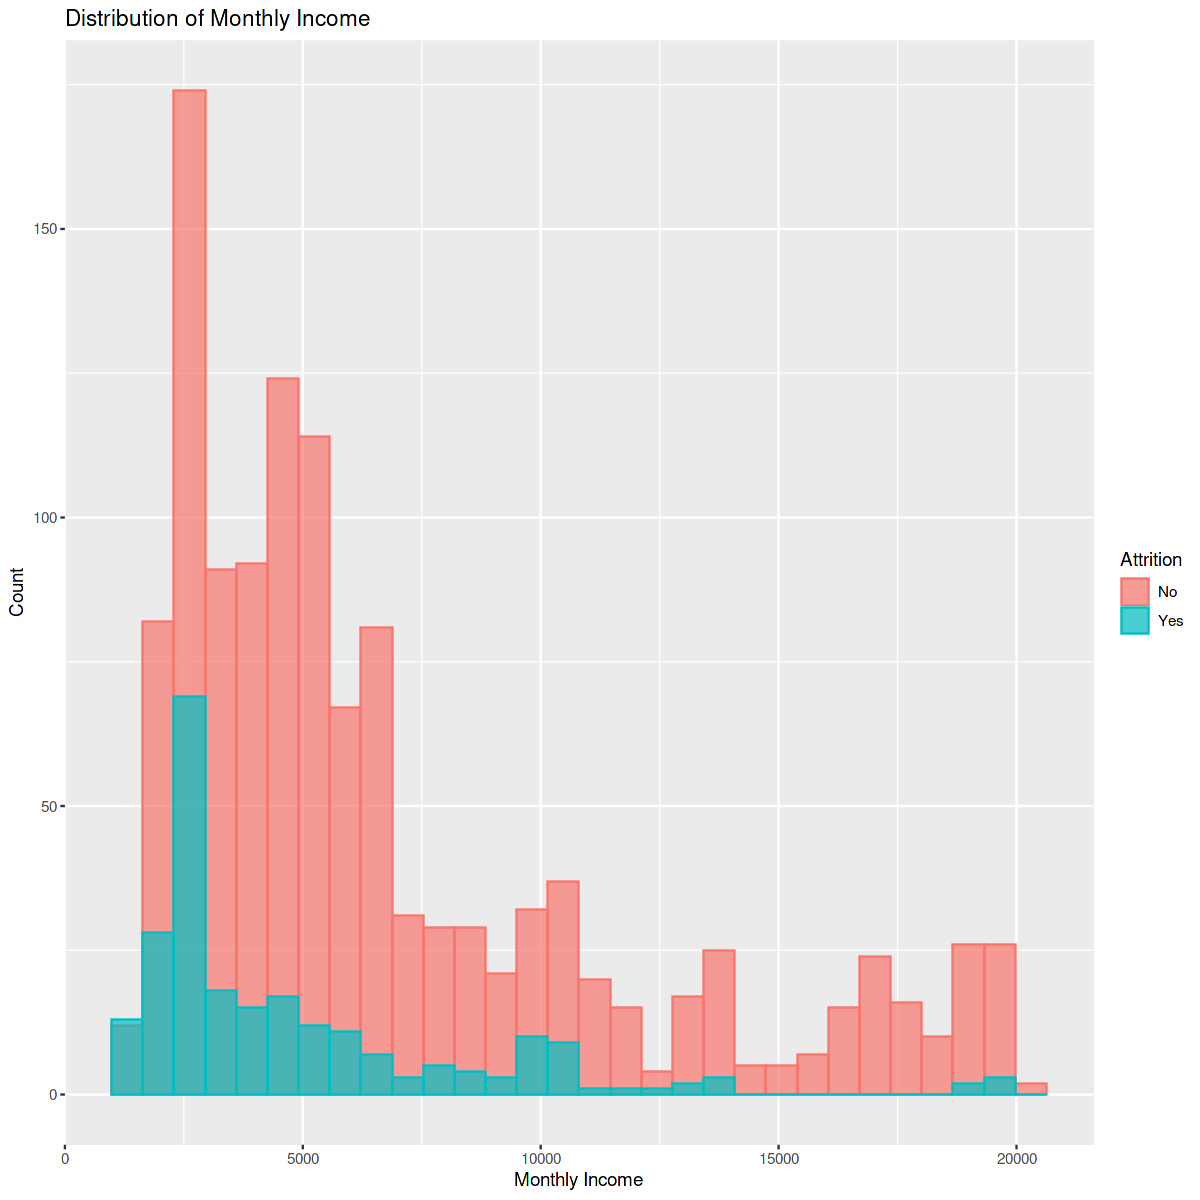

In [21]:
  ggplot(attrition.df, aes(x=MonthlyIncome,color=Attrition,fill=Attrition)) +
    geom_histogram(position="identity", alpha=0.7)+
    ggtitle("Distribution of Monthly Income ")+
    labs(x = "Monthly Income", y = "Count")
  

#### Relationship between Overtime and Monthly Income

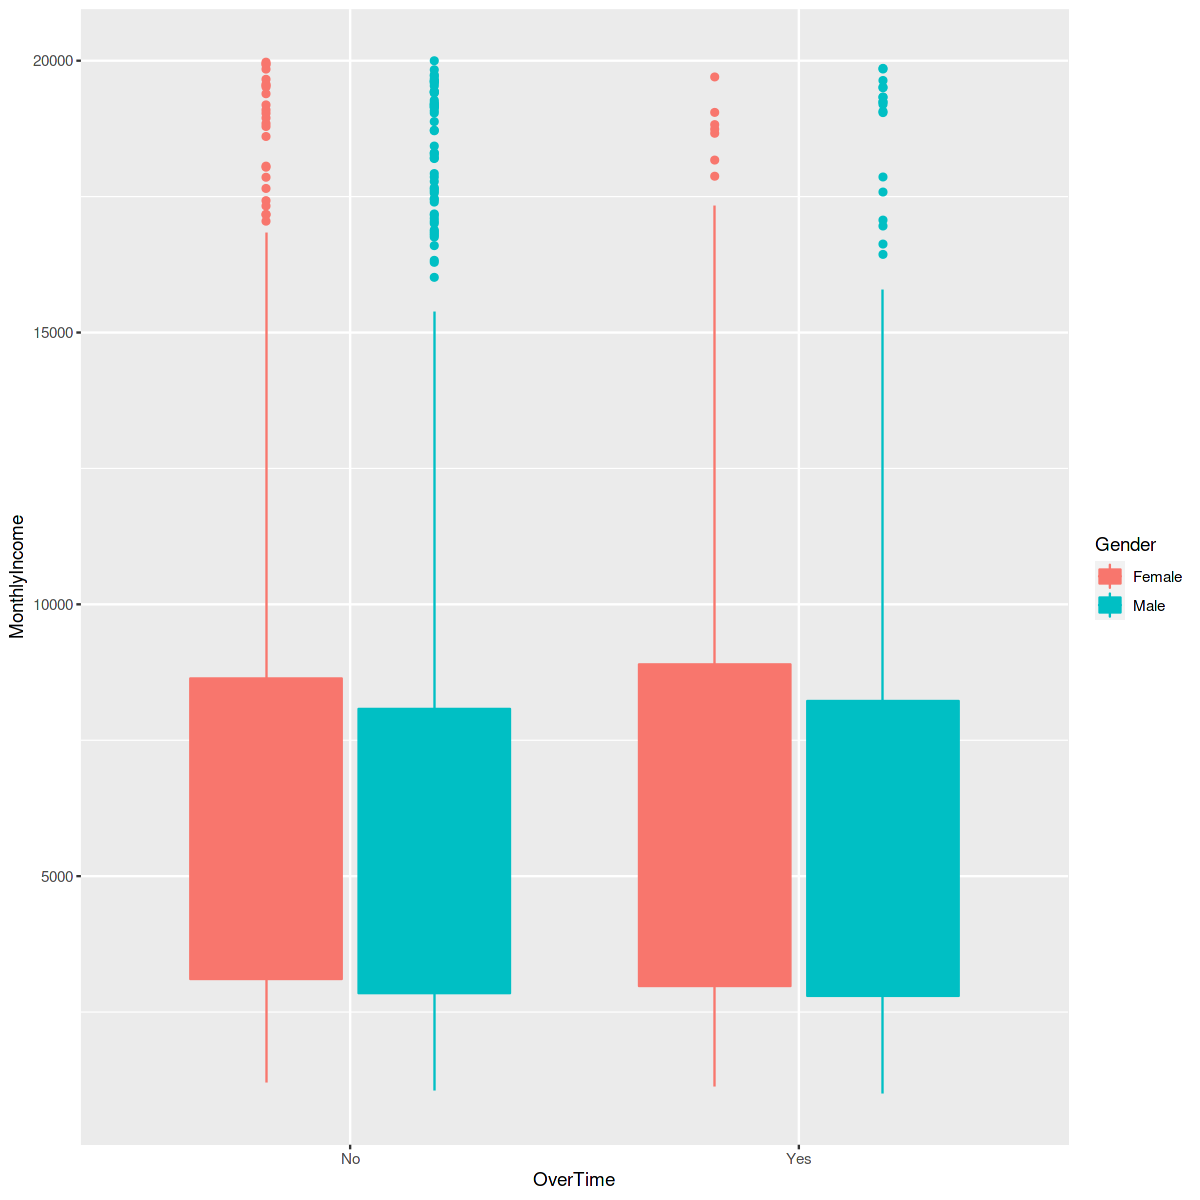

In [22]:
  ggplot(attrition.df, aes(x=OverTime, y=MonthlyIncome, color=Gender, fill=Gender)) +
    geom_boxplot() 

# Logistic regression - Model 1

In [23]:
##Step 1: Read data
attrition.df <- read.csv("../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv", stringsAsFactors = TRUE)
#str(attrition.df)

In [24]:

#preprocessing the data
#all relevant variables are categorical
#base level for attrition is "No" . changing it to "Yes"
attrition.df$Attrition<- as.numeric(attrition.df$Attrition == "Yes")
attrition.df$Attrition <- factor(attrition.df$Attrition)

In [25]:
#Set base level for categorical variables 
#attrition.df$Attrition<- relevel(attrition.df$Attrition, ref = "1")
#(attrition.df$Attrition)

In [26]:
### Step 3: Partition data
set.seed(132)
# select variables
#selected.var <- c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35)
selected.var <- c(29,19,16,23,1,4,15,6,32,13,2)
selected.df <- attrition.df[, selected.var]
str(selected.df)
#selected.df <- attrition.df[, 1:ncol(attrition.df)]
# partition the data
train.index <- sample(1:nrow(attrition.df), nrow(attrition.df)*0.7)  
train.df <- selected.df[train.index, ]
valid.df <- selected.df[-train.index, ]


'data.frame':	1470 obs. of  11 variables:
 $ TotalWorkingYears: int  8 10 7 8 6 8 12 1 10 17 ...
 $ MonthlyIncome    : int  5993 5130 2090 2909 3468 3068 2670 2693 9526 5237 ...
 $ JobRole          : Factor w/ 9 levels "Healthcare Representative",..: 8 7 3 7 3 3 3 3 5 1 ...
 $ OverTime         : Factor w/ 2 levels "No","Yes": 2 1 2 2 1 1 2 1 1 1 ...
 $ Age              : int  41 49 37 33 27 32 59 30 38 36 ...
 $ DailyRate        : int  1102 279 1373 1392 591 1005 1324 1358 216 1299 ...
 $ JobLevel         : int  2 2 1 1 1 1 1 1 3 2 ...
 $ DistanceFromHome : int  1 8 2 3 2 2 3 24 23 27 ...
 $ YearsAtCompany   : int  6 10 0 8 2 7 1 1 9 7 ...
 $ HourlyRate       : int  94 61 92 56 40 79 81 67 44 94 ...
 $ Attrition        : Factor w/ 2 levels "0","1": 2 1 2 1 1 1 1 1 1 1 ...


In [27]:
### Step 4: Fit a logistic regression model
logit.reg <- glm(Attrition ~ ., data = train.df, family = "binomial")
options(scipen = 999) 
summary(logit.reg)


Call:
glm(formula = Attrition ~ ., family = "binomial", data = train.df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4459  -0.5806  -0.4240  -0.2150   2.9802  

Coefficients:
                                 Estimate  Std. Error z value       Pr(>|z|)
(Intercept)                   -1.70428889  0.86035420  -1.981        0.04760
TotalWorkingYears              0.01505677  0.02826194   0.533        0.59420
MonthlyIncome                 -0.00000831  0.00008391  -0.099        0.92111
JobRoleHuman Resources         1.50352682  0.64687145   2.324        0.02011
JobRoleLaboratory Technician   1.26714341  0.55768819   2.272        0.02308
JobRoleManager                 0.26897458  0.87735743   0.307        0.75917
JobRoleManufacturing Director -0.87645486  0.75739435  -1.157        0.24719
JobRoleResearch Director      -0.44173263  0.97872545  -0.451        0.65175
JobRoleResearch Scientist      0.55251067  0.56773215   0.973        0.33046
JobRoleSales Executive     

In [28]:
### Step 5: Generate outcome by comparing predicted probability with the cutoff probability
logit.reg.pred <- predict(logit.reg, valid.df,  type = "response")
pred <- ifelse(logit.reg.pred > 0.3, 1, 0)
library(caret)
confusionMatrix(factor(pred), factor(valid.df$Attrition), positive = "1")
#5 manual calculation using logit

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 333  45
         1  25  38
                                          
               Accuracy : 0.8413          
                 95% CI : (0.8038, 0.8741)
    No Information Rate : 0.8118          
    P-Value [Acc > NIR] : 0.06163         
                                          
                  Kappa : 0.4276          
                                          
 Mcnemar's Test P-Value : 0.02315         
                                          
            Sensitivity : 0.45783         
            Specificity : 0.93017         
         Pos Pred Value : 0.60317         
         Neg Pred Value : 0.88095         
             Prevalence : 0.18821         
         Detection Rate : 0.08617         
   Detection Prevalence : 0.14286         
      Balanced Accuracy : 0.69400         
                                          
       'Positive' Class : 1               
                              

Setting levels: control = 0, case = 1

Setting direction: controls < cases



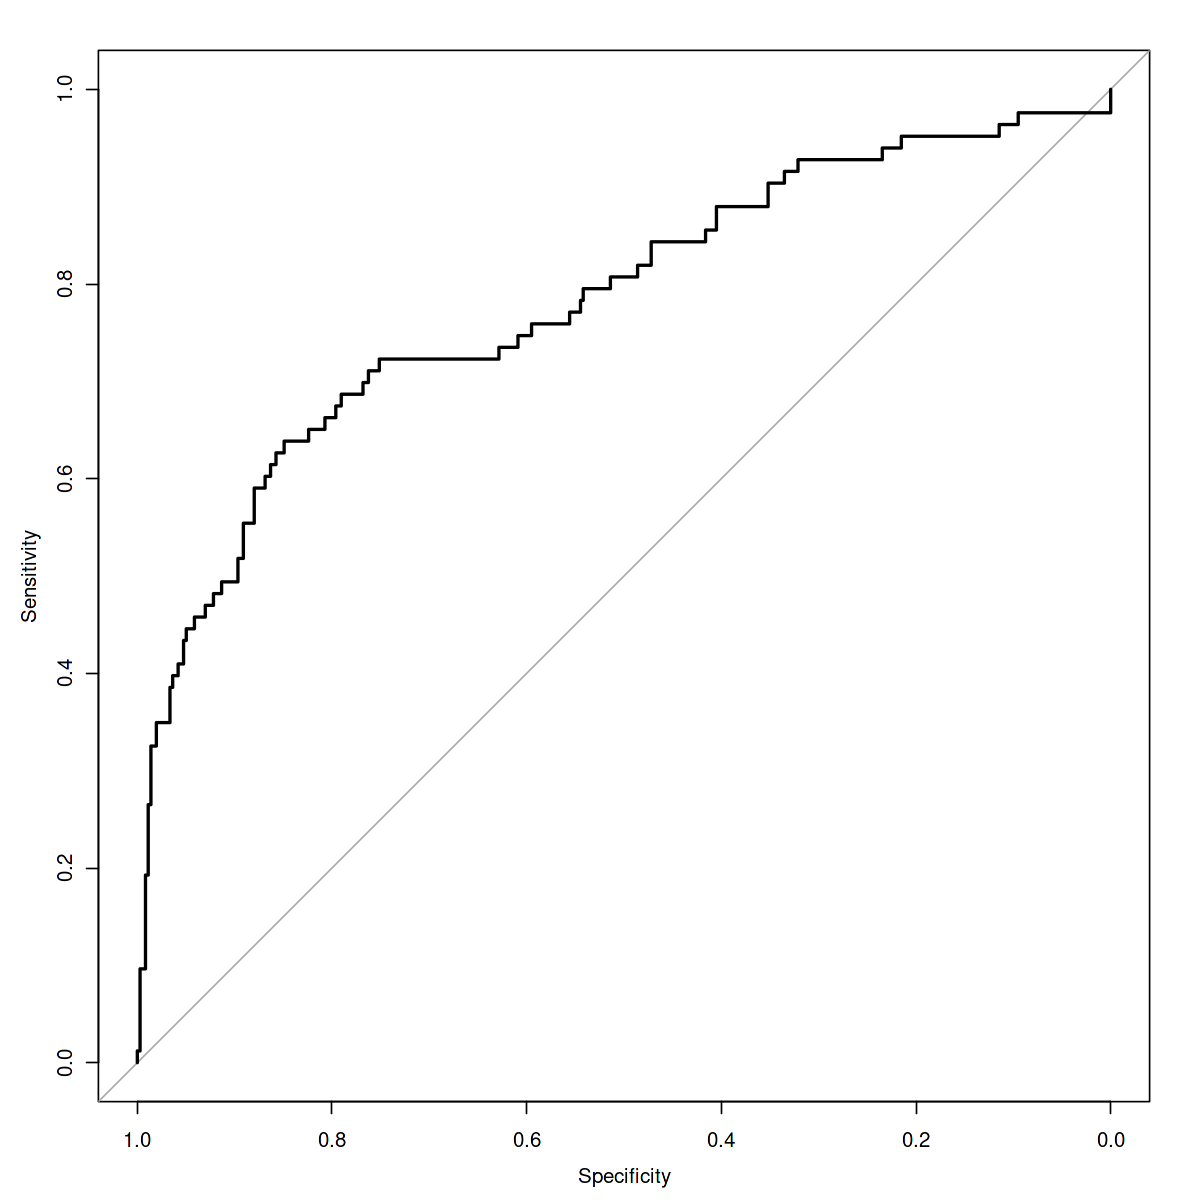

In [29]:

###Step 6: Generate ROC curve
library(pROC)
logit.reg.pred <- predict(logit.reg, valid.df,  type = "response")
pred <- ifelse(logit.reg.pred > 0.3, 1, 0)
r <- roc(valid.df$Attrition, logit.reg.pred)
plot.roc(r)

In [30]:
# find the best threshold, with a default best method "youden"
coords(r, x = "best")

coords(r, x = c(0.1, 0.2, 0.5))


threshold,specificity,sensitivity
<dbl>,<dbl>,<dbl>
0.2197998,0.849162,0.6385542


threshold,specificity,sensitivity
<dbl>,<dbl>,<dbl>
0.1,0.5000000,0.8072289
0.2,0.8212291,0.6506024
0.5,0.9916201,0.1325301


# Logistic regression - Model 2

In [31]:
##Step 1: Read data
attrition.df <- read.csv("../input/ibm-hr-analytics-attrition-dataset/WA_Fn-UseC_-HR-Employee-Attrition.csv", stringsAsFactors = TRUE)
#str(attrition.df)

In [32]:
##Step 2: Preprocess the data
#all relevant variables are categorical
#base level for attrition is "No" . changing it to "Yes"
attrition.df$Attrition<- as.numeric(attrition.df$Attrition == "Yes")
attrition.df$Attrition <- factor(attrition.df$Attrition)

#Set base level for categorical variables 
#attrition.df$Attrition<- relevel(attrition.df$Attrition, ref = "1")
#levels(attrition.df$Attrition)

In [33]:


### Step 3: Partition data
set.seed(132)
# select variables
#selected.var <- c(1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35)
#
selected.var <- c(3,28,5,11,8,20,35,34,17,10,2)
selected.var
#selected.var <- c()
selected.df <- attrition.df[, selected.var]
#selected.df <- attrition.df[, 1:ncol(attrition.df)]
# partition the data
train.index <- sample(1:nrow(attrition.df), nrow(attrition.df)*0.7)  
train.df <- selected.df[train.index, ]
valid.df <- selected.df[-train.index, ]

[1]  3 28  5 11  8 20 35 34 17 10  2

In [34]:
### Step 4: Fit a logistic regression model
logit.reg <- glm(Attrition ~ ., data = train.df, family = "binomial")
options(scipen = 999) 
summary(logit.reg)


Call:
glm(formula = Attrition ~ ., family = "binomial", data = train.df)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-1.4967  -0.5921  -0.4131  -0.2461   2.6707  

Coefficients:
                                     Estimate   Std. Error z value  Pr(>|z|)
(Intercept)                       0.110142994  0.849220847   0.130  0.896805
BusinessTravelTravel_Frequently   1.710714885  0.507002067   3.374  0.000740
BusinessTravelTravel_Rarely       1.018814347  0.484127294   2.104  0.035341
StockOptionLevel                 -0.546115322  0.131348194  -4.158 0.0000321
DepartmentResearch & Development -0.382280476  0.548397546  -0.697  0.485749
DepartmentSales                   0.090720128  0.566784059   0.160  0.872833
EnvironmentSatisfaction          -0.361141526  0.084948752  -4.251 0.0000213
EducationFieldLife Sciences      -0.633750362  0.784099913  -0.808  0.418945
EducationFieldMarketing          -0.244963568  0.829493412  -0.295  0.767752
EducationFieldMedical      

In [35]:
### Step 5: Generate outcome by comparing predicted probability with the cutoff probability
logit.reg.pred <- predict(logit.reg, valid.df,  type = "response")
pred <- ifelse(logit.reg.pred > 0.3, 1, 0)
library(caret)
confusionMatrix(factor(pred), factor(valid.df$Attrition), positive = "1")
#5 manual calculation using logit

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 332  64
         1  26  19
                                          
               Accuracy : 0.7959          
                 95% CI : (0.7552, 0.8326)
    No Information Rate : 0.8118          
    P-Value [Acc > NIR] : 0.8201          
                                          
                  Kappa : 0.1896          
                                          
 Mcnemar's Test P-Value : 0.00009614      
                                          
            Sensitivity : 0.22892         
            Specificity : 0.92737         
         Pos Pred Value : 0.42222         
         Neg Pred Value : 0.83838         
             Prevalence : 0.18821         
         Detection Rate : 0.04308         
   Detection Prevalence : 0.10204         
      Balanced Accuracy : 0.57814         
                                          
       'Positive' Class : 1               
                              

Setting levels: control = 0, case = 1

Setting direction: controls < cases



threshold,specificity,sensitivity
<dbl>,<dbl>,<dbl>
0.1703182,0.7402235,0.5662651


threshold,specificity,sensitivity
<dbl>,<dbl>,<dbl>
0.1,0.4860335,0.71084337
0.2,0.8016760,0.44578313
0.5,0.9916201,0.04819277


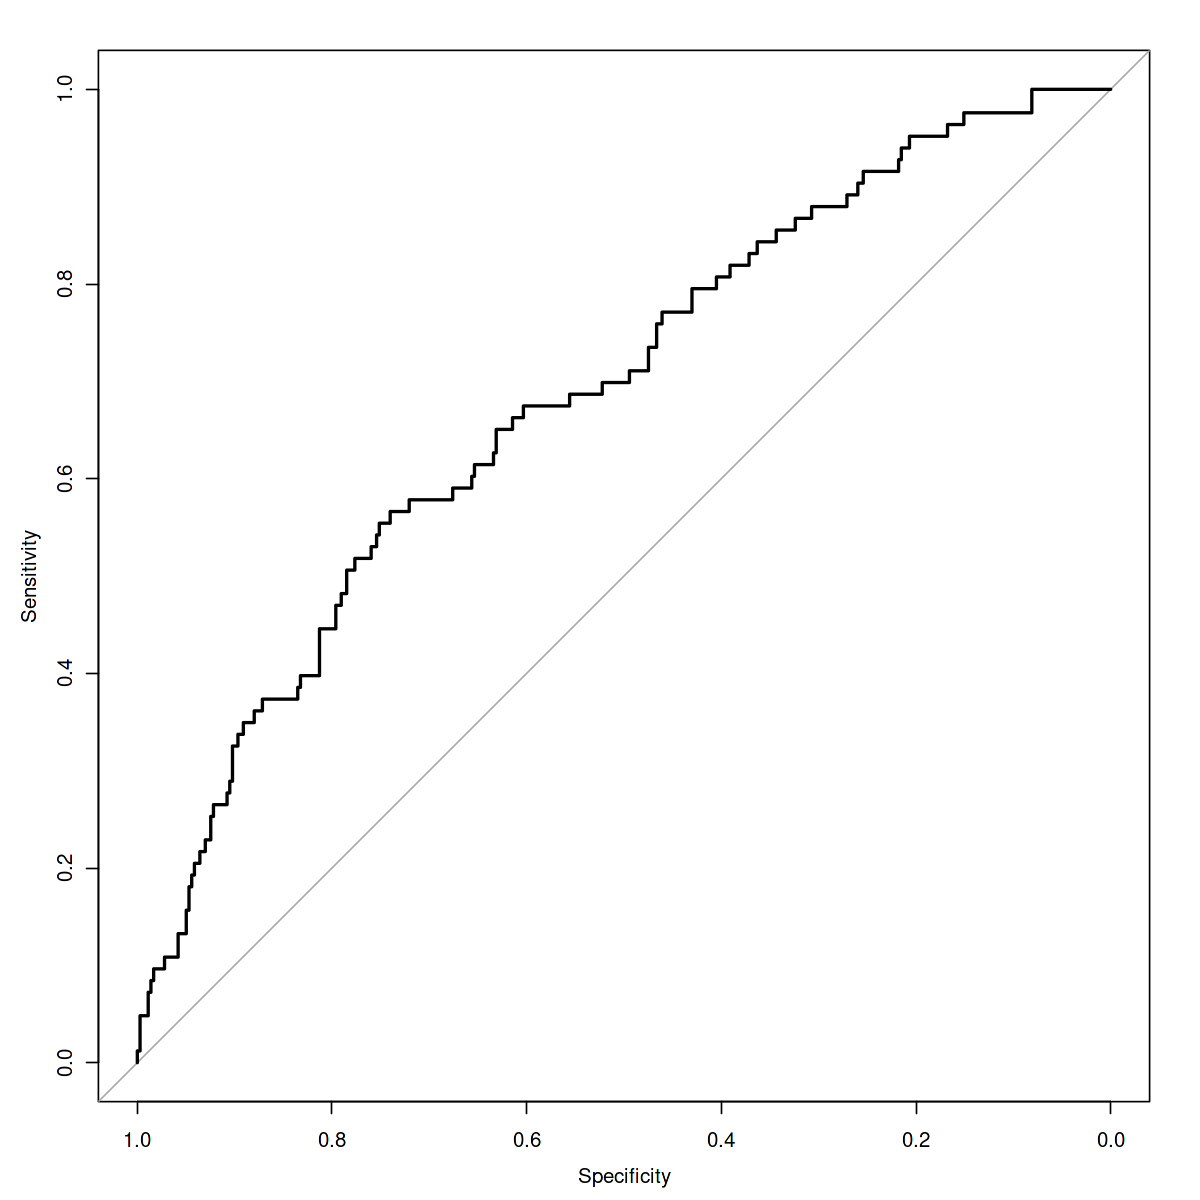

In [36]:
###Step 6: Generate ROC curve
library(pROC)
logit.reg.pred <- predict(logit.reg, valid.df,  type = "response")
pred <- ifelse(logit.reg.pred > 0.3, 1, 0)
r <- roc(valid.df$Attrition, logit.reg.pred)
plot.roc(r)

# find the best threshold, with a default best method "youden"
coords(r, x = "best")

coords(r, x = c(0.1, 0.2, 0.5))


# Comparison of Model's

## Summary of Result from both model's
---------------------------
### model 1:
 #### Accuracy : 0.8413 
 #### Sensitivity : 0.45783         
 #### Specificity : 0.93017 
 
### model 2:
-------------------------------
 #### Accuracy : 0.7959  
 #### Sensitivity : 0.22892         
 #### Specificity : 0.92737


The accuracy achieved through this model 1 is around 84% and the sensitivity and specificity is approximately 0.46 and 0.93 respectively. On evaluating the model we can see that the model has a high specificity and hence the modal is able to quite accurately predict the negative cases correctly i.e the case when an employee will leave the organisation.
